<h2>Домашнее задание по курсу "Методы машинного обучения"</h2>
<p><b>Вариант:</b> 1</p>
<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<ol>
    <li>Поиск и выбор набора данных для построения модели машинного обучения. На основе выбранного набора данных строится модель машинного обучения для решения или задачи классификации, или задачи регрессии.</li>
        <li>Для выбранного датасета (датасетов) на основе материалов лекций, в целях улучшения выборки, решить следующие задачи (если это необходимо в данном датасете):
        <ul>
            <li>устранение пропусков в данных;</li>
            <li>кодирование категориальных признаков;</li>
            <li>нормализацию числовых признаков;</li>
            <li>масштабирование признаков;</li>
            <li>обработку выбросов для числовых признаков;</li>
            <li>обработку нестандартных признаков (которые не является числовым или категориальным);</li>
            <li>отбор признаков, наиболее подходящих для построения модели;</li>
            <li>устранение дисбаланса классов в случае решения задачи классификации на дисбалансированной выборке.</li>
        </ul>
    </li>
    <li>Обучить модель и оценить метрики качества для двух выборок :
        <ul>
            <li>исходная выборка, которая содержит только минимальную предобработку данных, необходимую для построения модели (например, кодирование категориальных признаков).</li>
            <li>улучшенная выборка, полученная в результате полной предобработки данных в пункте 2.</li>
        </ul>
    </li>
    <li>Построить модель с использованием произвольной библиотеки AutoML.</li>
    <li>Сравнить метрики для трех полученных моделей.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mushrooms.csv', sep = ",")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h4>Расшифровка датасета:</h4>
<p><b>Целевой признак:</b></p>
<ul>
    <li>class: edible=e, poisonous=p</li>
</ul>
<p><b>Признаки:</b></p> 
<ul>
    <li>cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s</li>
    <li>cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s</li>
    <li>cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y</li>
    <li>bruises: bruises=t,no=f</li>
    <li>odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s</li>
    <li>gill-attachment: attached=a,descending=d,free=f,notched=n</li>
    <li>gill-spacing: close=c,crowded=w,distant=d</li>
    <li>gill-size: broad=b,narrow=n</li>
    <li>gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y</li>
    <li>stalk-shape: enlarging=e,tapering=t</li>
    <li>stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r</li>
    <li>stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s</li>
    <li>stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s</li>
    <li>stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</li>
    <li>stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</li>
    <li>veil-type: partial=p,universal=u</li>
    <li>veil-color: brown=n,orange=o,white=w,yellow=y</li>
    <li>ring-number: none=n,one=o,two=t</li>
    <li>ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z</li>
    <li>spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y</li>
    <li>population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y</li>
    <li>habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d</li>
</ul>







<h3>Устранение пропусков</h3>

In [3]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [4]:
data2 = data.dropna(subset=['stalk-root'])
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data2.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data2.shape[0])/data.shape[0]*100, 4)))

Число записей до удаления: 8124
Число записей после удаления: 5644
Процент потерь данных: 30.5268 %


Потеря данных велика, данный вариант устранения пропущенных значений не самый подходящий. Заменим пропуски уникальным симвлолом для этого столбца.

In [5]:
np.unique(data2['stalk-root'])

array(['b', 'c', 'e', 'r'], dtype=object)

In [6]:
Imputation = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'm') # m = missing
data[['stalk-root']] = Imputation.fit_transform(data[['stalk-root']])
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<h3>Кодирование категориальных признаков</h3>

In [7]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
labelEnc = LabelEncoder()
for col in data:
    data[col] = labelEnc.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<h3>Отбор признаков</h3>

<AxesSubplot:>

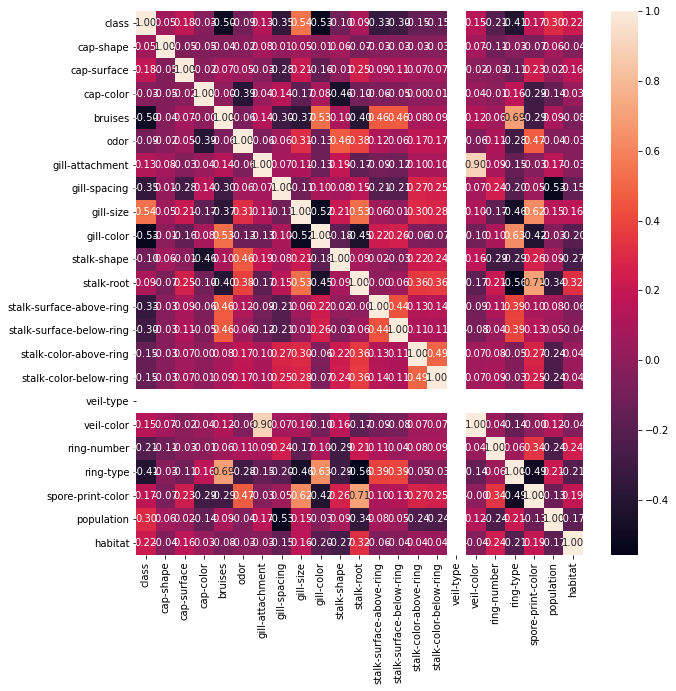

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

Признак veil-type имеет наивысший коэффициент корреляции со всеми полями. Выведем возможные варианты его состояний. 

In [10]:
np.unique(data['veil-type'])

array([0])

Поле  veil-type имеет всего 1 вариант состояния. Его можно исключить из выборки.

In [11]:
data = data.drop(columns=['veil-type'])
for row in data.corr():
    if abs(data.corr()[row]['class']) >= 0.5:
        print(row, data.corr()[row]['class'])

class 1.0
bruises -0.5015303774075601
gill-size 0.5400243574330161
gill-color -0.5305661908665233


Отбор на основе корреляции не дал хороших результатов. Попробуем применить отбор методом, основанным на статистических характеристиках.

<AxesSubplot:>

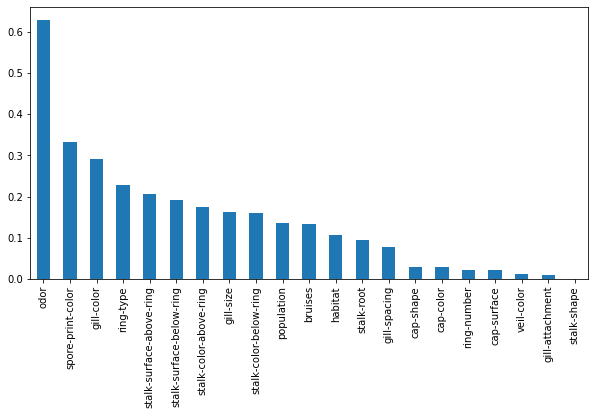

In [12]:
mi = mutual_info_classif(data.drop(columns=['class']), data['class'])
mi = pd.Series(mi)
mi.index = data.drop(columns=['class']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

<AxesSubplot:>

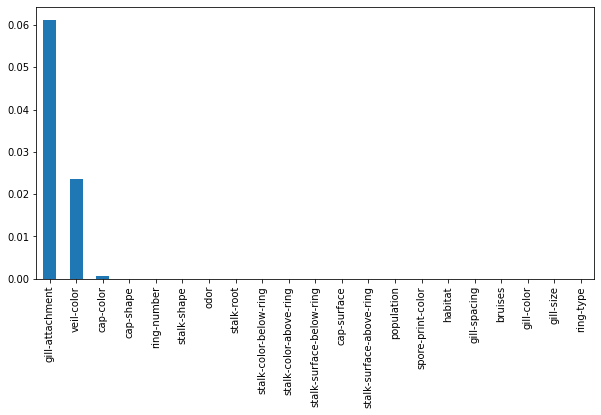

In [13]:
mi = chi2(data.drop(columns=['class']), data['class'])[1]
mi = pd.Series(mi)
mi.index = data.drop(columns=['class']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

<AxesSubplot:>

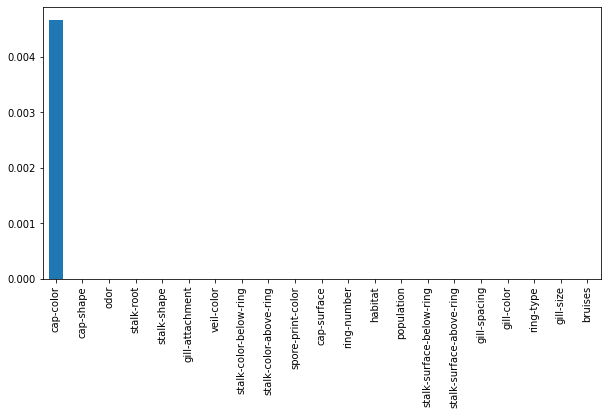

In [14]:
mi = f_classif(data.drop(columns=['class']), data['class'])[1]
mi = pd.Series(mi)
mi.index = data.drop(columns=['class']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

Отбор методом, основанным на статистических характеристиках выдал признак <b>odor</b>. 

In [15]:
selectedFeatures = ['odor']
def featureSelector(featuerInfo, lim):
    for ind in featuerInfo.index:
        if fi[ind] > lim:
            selectedFeatures.append(ind)

Попробуем теперь применить метод вложений отбора признаков

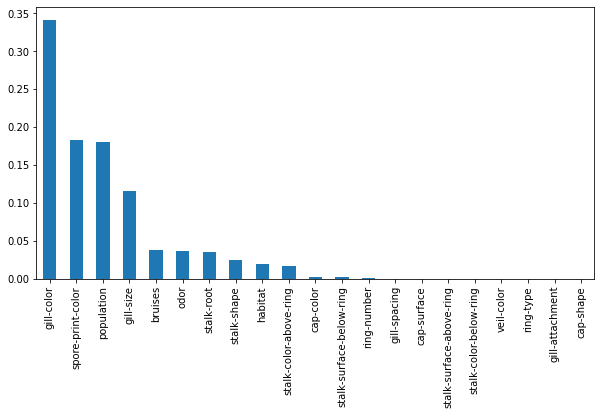

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(data.drop(columns=['class']), data['class'])
fi = dtc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['class']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.10)

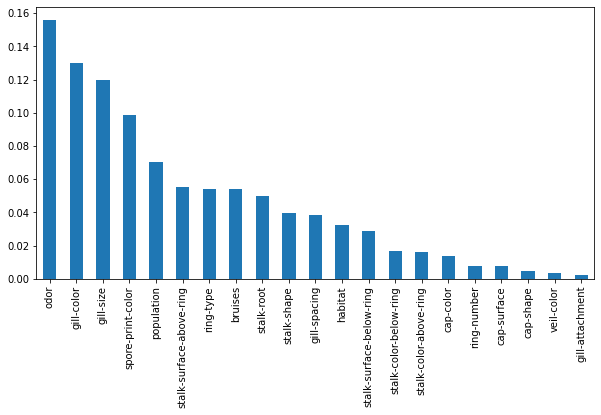

In [17]:
rfc = RandomForestClassifier()
rfc.fit(data.drop(columns=['class']), data['class'])
fi = rfc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['class']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.10)

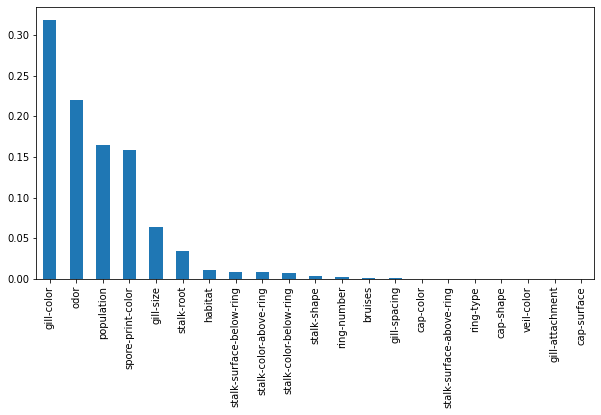

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(data.drop(columns=['class']), data['class'])
fi = gbc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['class']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.10)

In [19]:
selectedFeatures

['odor',
 'gill-size',
 'gill-color',
 'spore-print-color',
 'population',
 'odor',
 'gill-size',
 'gill-color',
 'odor',
 'gill-color',
 'spore-print-color',
 'population']

<h3>Обучение моделей</h3> 

In [20]:
models = {
    'KNN': KNeighborsClassifier,
    'LR': LogisticRegression,
    'DTC': DecisionTreeClassifier,
    'RFC': RandomForestClassifier,
    'GBC': GradientBoostingClassifier
    
}
xTrain, xTest, yTrain, yTest =  train_test_split(data.drop(columns=['class']), data['class'], test_size=0.3, random_state = 1)

In [21]:
report = []
for modelName, model in models.items():
    tmp = [modelName + '_all',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [22]:
xTrain, xTest, yTrain, yTest =  train_test_split(data[selectedFeatures], data['class'], test_size=0.3, random_state = 1)

In [23]:
for modelName, model in models.items():
    tmp = [modelName + '_sel',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [24]:
dfReport = pd.DataFrame(report, columns=['Model','Accuracy','Precision','Recall'])
dfReport = dfReport.sort_values(by=['Model'])
dfReport.head(10)

,Model,Accuracy,Precision,Recall
7,DTC_all,0.994258,1.000000,0.988353
2,DTC_sel,1.000000,1.000000,1.000000
9,GBC_all,0.994258,1.000000,0.988353
4,GBC_sel,1.000000,1.000000,1.000000
5,KNN_all,0.994258,1.000000,0.988353
0,KNN_sel,0.999590,1.000000,0.999168
6,LR_all,0.866284,0.886243,0.836106
1,LR_sel,0.956112,0.963590,0.946755
8,RFC_all,0.994258,1.000000,0.988353
3,RFC_sel,1.000000,1.000000,1.000000


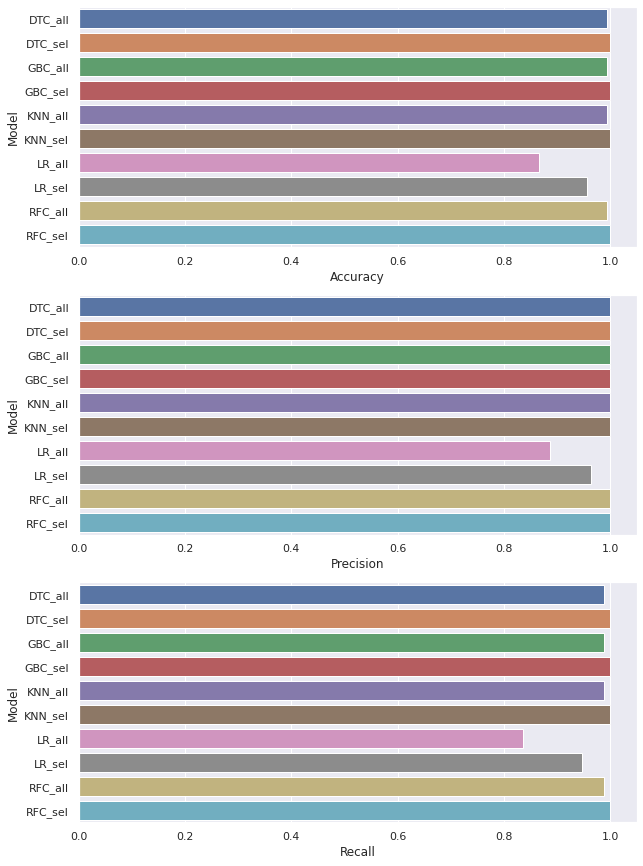

In [25]:
sns.set(style="whitegrid")
i = 1
for col in dfReport.drop(columns=['Model']):
    sns.set(rc={'figure.figsize':(10,15)})
    plt.subplot(3, 1, i)
    sns.barplot(x=col, y="Model", data=dfReport)
    i += 1